In [74]:
import numpy as np
from random import randint as rnd
import math
import matplotlib.collections as mc
import matplotlib.pylab as pl
np.random.seed(rnd(0,10000))

In [75]:
def genlines(c,i):
    lines = []
    for j in range(0,len(i)-1):
        lines.append([c[i[j]],c[i[j+1]]])
    return lines

In [76]:
def getdistance(fc,sc):
    return math.sqrt(abs(sc[0]-fc[0])**2+abs(sc[1]-fc[1])**2)
def howfar(l):
    dist = 0
    for j in range(0, len(l)):
        dist += getdistance(l[j][0], l[j][1])
    return dist

In [77]:
def plotitinerary(c,i,ptitle,tname):
    lc=mc.LineCollection(genlines(c,i),linewidth=2)
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    pl.scatter(x,y)
    pl.title(ptitle)
    pl.xlabel('X coordinate')
    pl.ylabel('Y coordinate')
    pl.savefig(str(tname)+'.png')
    pl.close

In [78]:
def findnearest(c,idx,nnit):
    point = c[idx]
    mindistance = float('inf')
    minidx = -1
    for j in range(0,len(c)):
        dist = getdistance(c[j],point)
        if dist < mindistance and dist > 0 and j not in nnit:
            mindistance = dist
            minidx = j
    return(minidx)

In [79]:
def donn(c, N):
    nnit = [0]
    for j in range(0, n - 1):
        nextc = findnearest(c, nnit[len(nnit)-1], nnit)
        nnit.append(nextc)
    return nnit

In [80]:
def perturb(c, i):
    neig1 = math.floor(np.random.rand() * (len(i)))
    neig2 = math.floor(np.random.rand() * (len(i)))
    i2 = i.copy()
    i2[neig1]=i[neig2]
    i2[neig2]=i[neig1]
    dist1 = howfar(genlines(c,i))
    dist2 =  howfar(genlines(c,i2))
    ireturn = i.copy()
    if (dist1 > dist2):
        ireturn = i2.copy()
    return ireturn.copy()

In [81]:
def perturb_sa1(c,i,t):
    neig1 = math.floor(np.random.rand() * (len(i)))
    neig2 = math.floor(np.random.rand() * (len(i)))
    i2 = i.copy()
    i2[neig1]=i[neig2]
    i2[neig2]=i[neig1]
    dist1 = howfar(genlines(c,i))
    dist2 =  howfar(genlines(c,i2))
    ireturn = i.copy()
    randomdraw = np.random.rand()
    temperature = 1/((t/1000)+1)
    if ((dist1 < dist2 and randomdraw < temperature) or (dist1 > dist2)):
        ireturn = i2.copy()
    return ireturn.copy()

In [82]:
def perturb_sa2(c,i,t):
    neig1 = math.floor(np.random.rand() * (len(i)))
    neig2 = math.floor(np.random.rand() * (len(i)))
    i2 = i.copy()
    ireturn = i.copy()
    randomdraw = np.random.rand()
    randomdraw2 = np.random.rand()
    small = min(neig1,neig2)
    big = max(neig1,neig2)
    if (randomdraw2 >= 0.55):
        i2[small:big] = i[small:big][::-1]
    elif (randomdraw2 <0.45):
        ti = i[small:big]
        del i2[small:big]
        neig3 = math.floor(np.random.rand() * (len(i)))
        for n in range(0,len(ti)):
            i2.insert(neig3 + n,ti[n])
    else:
        i2[neig1] = i[neig2]
        i2[neig2] = i[neig1]
    dist1 = howfar(genlines(c,i))
    dist2 = howfar(genlines(c,i2))
    temperature = 1/((t/1000)+1)
    if ((dist1 < dist2 and randomdraw < temperature) or (dist1 > dist2)):
        ireturn = i2.copy()
    return ireturn

In [83]:
def perturb_sa2(c,i,t):
    neig1 = math.floor(np.random.rand() * (len(i)))
    neig2 = math.floor(np.random.rand() * (len(i)))
    i2 = i.copy()
    ireturn = i.copy()
    randomdraw = np.random.rand()
    randomdraw2 = np.random.rand()
    small = min(neig1,neig2)
    big = max(neig1,neig2)
    if (randomdraw2 >= 0.55):
        i2[small:big] = i[small:big][::-1]
    elif (randomdraw2 <0.45):
        ti = i[small:big]
        del i2[small:big]
        neig3 = math.floor(np.random.rand() * (len(i)))
        for n in range(0,len(ti)):
            i2.insert(neig3 + n,ti[n])
    else:
        i2[neig1] = i[neig2]
        i2[neig2] = i[neig1]
    dist1 = howfar(genlines(c,i))
    dist2 = howfar(genlines(c,i2))
    temperature = 1/((t/1000)+1)
    scale = 3.5
    if ((dist1 < dist2 and randomdraw < (math.exp(scale*(dist1-dist2))*temperature)) or (dist1 > dist2)):
        ireturn = i2.copy()
    return ireturn

In [84]:
def perturb_sa3(c,i,t, maxitin):
    neig1 = math.floor(np.random.rand() * (len(i)))
    neig2 = math.floor(np.random.rand() * (len(i)))
    global mindistance
    global minit
    global minidx
    i2 = i.copy()
    ireturn = i.copy()
    randomdraw = np.random.rand()
    randomdraw2 = np.random.rand()
    small = min(neig1,neig2)
    big = max(neig1,neig2)
    if (randomdraw2 >= 0.55):
        i2[small:big] = i[small:big][::-1]
    elif (randomdraw2 <0.45):
        ti = i[small:big]
        del i2[small:big]
        neig3 = math.floor(np.random.rand() * (len(i)))
        for n in range(0,len(ti)):
            i2.insert(neig3 + n,ti[n])
    else:
        i2[neig1] = i[neig2]
        i2[neig2] = i[neig1]
    dist1 = howfar(genlines(c,i))
    dist2 = howfar(genlines(c,i2))
    temperature = 1/(t/(maxitin/1000)+1)
    scale = 3.5
    if ((dist1 < dist2 and randomdraw < (math.exp(scale*(dist1-dist2))*temperature)) or (dist1 > dist2)):
        ireturn = i2.copy()
    reset = True
    resetthresh = 0.04
    if (reset and (t-minidx) > (maxitin * resetthresh)):
        iretrurn = minit
        minidx = t
    if (howfar(genlines(c,ireturn))  < mindistance):
        mindistance = howfar(genlines(c,i2))
        minit = ireturn
        minidx = t
    if (abs(t - maxitin) <= 1):
        ireturn = minit.copy()
    return ireturn

In [85]:
def salesman(i,c):
    newi = i.copy()
    global mindistance
    global minit
    global minidx
    mindistance = howfar(genlines(c,i))
    minit = i
    minidx = 0
    maxitin = len(i) * 50000
    for j in range(0,maxitin):
        newi = perturb_sa3(c,newi,j,maxitin)
    return newi

In [86]:
n = 40
x = np.random.rand(n)
y = np.random.rand(n)
points = zip(x,y)
cities = list(points)
itinerary = list(range(0,n))



In [87]:
i_ps = itinerary.copy()
for j in range(0,len(itinerary)*50000):
    i_ps = perturb(cities, i_ps)
i_sa = itinerary.copy()
for j in range(0,len(itinerary)*50000):
    i_sa = perturb_sa1(cities, i_sa,j)
i_sa2 = itinerary.copy()
for j in range(0,len(itinerary)*50000):
    i_sa2 = perturb_sa2(cities, i_sa2,j)
i_sa3 = salesman(itinerary, cities)

In [88]:
totaldistance = howfar(genlines(cities, itinerary))
neardistance = howfar(genlines(cities,donn(cities,n)))
sortdistance = howfar(genlines(cities, i_ps))
firedistance = howfar(genlines(cities, i_sa))
firedistance2 = howfar(genlines(cities, i_sa2))
firedistance3 = howfar(genlines(cities, i_sa3))
print(f'linear distance: {totaldistance}')
print(f'nearest distance: {neardistance}')
print(f'sorted distance: {sortdistance}')
print(f'fired distance: {firedistance}')
print(f'fired2 distance: {firedistance2}')
print(f'fired3 distance: {firedistance3}')

linear distance: 17.93434848280357
nearest distance: 6.160363723806552
sorted distance: 6.085267773523668
fired distance: 6.256778800833882
fired2 distance: 4.443872980475201
fired3 distance: 4.425721869280484


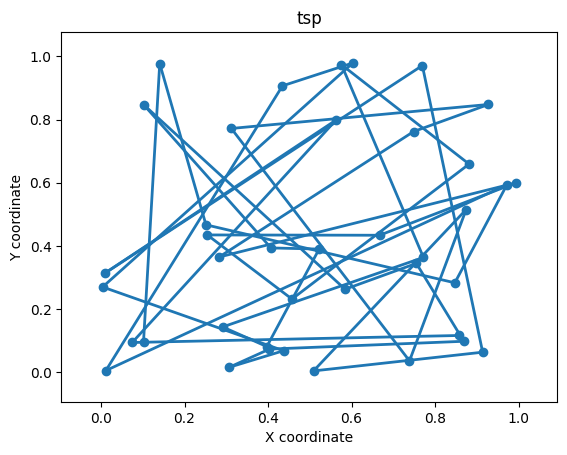

In [27]:
plotitinerary(cities,itinerary,'tsp - random', 'random')

5.964915896770795


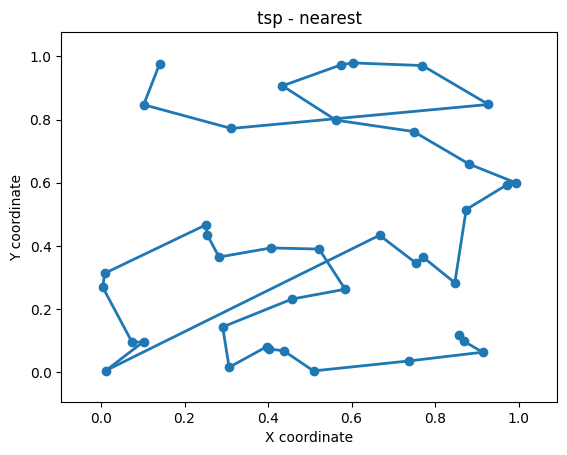

In [28]:
plotitinerary(cities,donn(cities,n), 'tsp - nearest','nearest')
print(howfar(genlines(cities,donn(cities,n))))

6.557261603628122


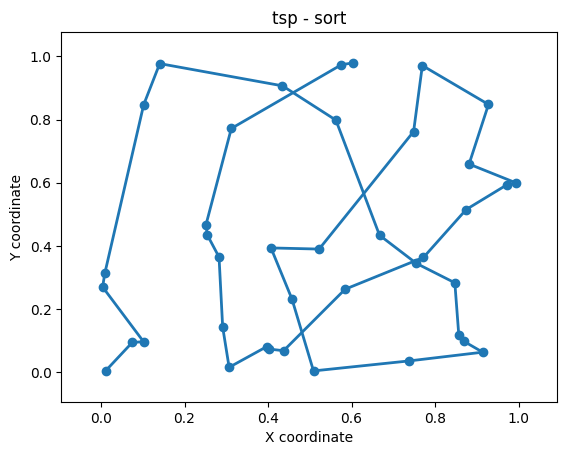

In [32]:
i_ps = itinerary.copy()
for j in range(0,len(itinerary)*50000):
    i_ps = perturb(cities, i_ps)
print(howfar(genlines(cities,i_ps)))
plotitinerary(cities,i_ps, 'tsp - sort','sotred')

8.712975747149656


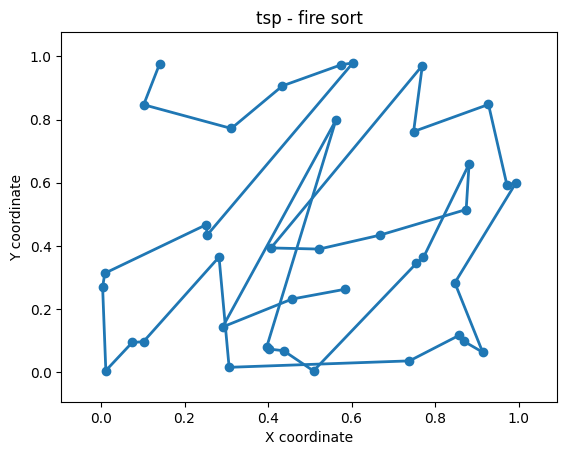

In [42]:
i_sa = itinerary.copy()
for j in range(0,len(itinerary)*50000):
    i_sa = perturb_sa1(cities, i_sa,j)
print(howfar(genlines(cities,i_sa)))
plotitinerary(cities,i_sa, 'tsp - fire sort','fire_sotred')

0.0


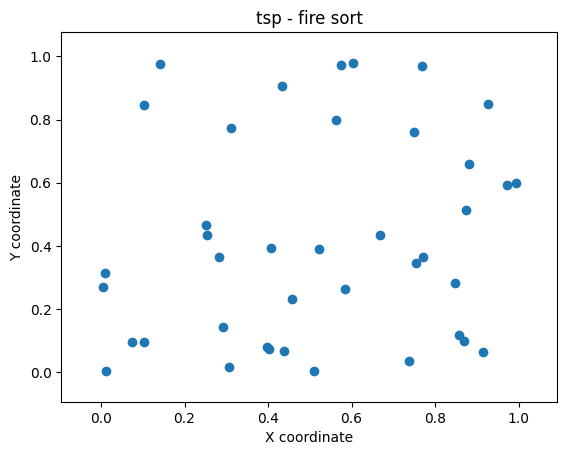

In [52]:
i_sa2 = itinerary.copy()
for j in range(0,len(itinerary)*50000):
    i_sa2 = perturb_sa2(cities, i_sa2,j)
print(howfar(genlines(cities,i_sa2)))
plotitinerary(cities,i_sa2, 'tsp - fire sort2','fire_sotred2')

5.066854902984729


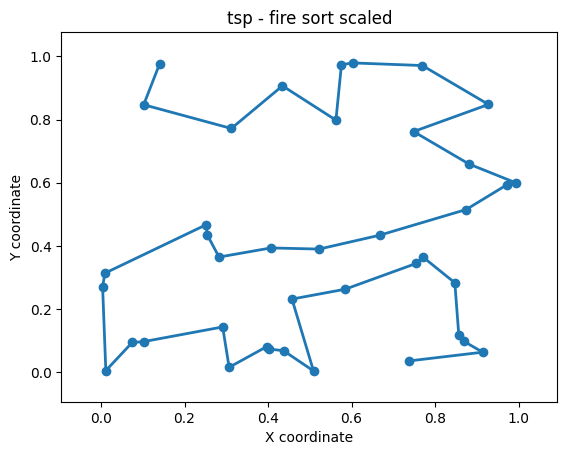

In [58]:
i_sa2 = itinerary.copy()
for j in range(0,len(itinerary)*50000):
    i_sa2 = perturb_sa2(cities, i_sa2,j)
print(howfar(genlines(cities,i_sa2)))
plotitinerary(cities,i_sa2, 'tsp - fire sort scaled','fire_sort_scaled')

4.91883003019178


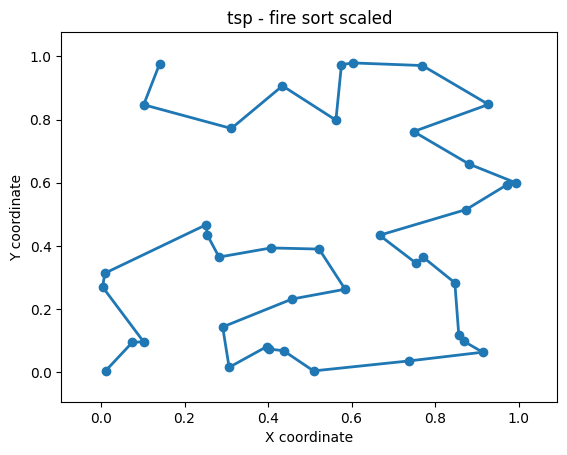

In [68]:
rout = salesman(itinerary, cities)
print(howfar(genlines(cities,rout)))
plotitinerary(cities,rout, 'tsp - fire sort scaled','fire_sort_scaled')

21.275930639491428
5.964915896770795
8.712975747149656
5.066854902984729
4.91883003019178
